In [311]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [312]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [313]:
saved_style_state = matplotlib.rcParams.copy()

In [314]:
if os.path.isfile("opal_dataset.csv"):
    filepath = "opal_dataset.csv"
    print "loading from file"
else:
    filepath = "https://opendata.transport.nsw.gov.au/node/1640/download/time-loc_20160808-14.csv"
    print "loading from the internet"

opal_data = pd.read_csv(filepath)
print "done"

loading from file
done


In [315]:
opal_data.head(5)

,mode,date,tap,time,loc,count
0,bus,20160809.0,on,02:30,2000,81.0
1,bus,20160809.0,on,13:30,2095,93.0
2,bus,20160809.0,on,13:30,2097,33.0
3,bus,20160809.0,on,13:30,2090,22.0
4,bus,20160809.0,on,13:30,2093,19.0


In [316]:
opal_data.columns

Index([u'mode', u'date', u'tap', u'time', u'loc', u'count'], dtype='object')

In [317]:
import requests, json 

def post_getter(postcode):
    url = "http://v0.postcodeapi.com.au/suburbs/" + str(postcode) + ".json"
    
    getter = requests.get(url)
    
    data = json.loads(getter.text)
    
    return data[0]["name"]
    
actual_loc = post_getter("2000")

buslist = [2000, 2150, 2022, 2031, 2010]
burblist = []

for i in buslist:
    result = post_getter(i)
    burblist.append(result)
    
burblist
    

[u'The Rocks', u'Harris Park', u'Queens Park', u'Clovelly', u'Surry Hills']

In [318]:
opal_data["loc_con"] = opal_data[(opal_data['mode'] =='bus') & (opal_data['loc'] != '-1')]["loc"].head().apply(post_getter)

In [319]:
# opal_data["top 5"] = opal_data.head().apply(burblist)

In [320]:
opal_data.head()

,mode,date,tap,time,loc,count,loc_con
0,bus,20160809.0,on,02:30,2000,81.0,The Rocks
1,bus,20160809.0,on,13:30,2095,93.0,Manly
2,bus,20160809.0,on,13:30,2097,33.0,Collaroy
3,bus,20160809.0,on,13:30,2090,22.0,Cremorne Junction
4,bus,20160809.0,on,13:30,2093,19.0,Balgowlah


In [321]:
# graph_2 = opal_data[(opal_data['mode'] =='train') & (opal_data['loc'] != '-1') & (opal_data['tap'] =='on') & (opal_data['date'] == 20160809.0)]
# graph_2

In [322]:
# graph_1

In [323]:
graph_1 = opal_data[(opal_data['mode'] =='bus') & (opal_data['loc'] != '-1') & (opal_data['tap'] =='on') & (opal_data['date'] == 20160809.0)]
postcodecounts = graph_1['loc'].value_counts()
top_5 = postcodecounts.head(5)
top_5

2000    95
2010    78
2150    76
2026    74
2022    73
Name: loc, dtype: int64

In [324]:
new_columns = graph_1.groupby ("loc")['count'].sum()

In [325]:
sorted_0 = new_columns.sort_values(ascending = False)
sorted_0

loc
2000    147922.0
2150     26579.0
2022     21241.0
2031     21134.0
2010     18059.0
2033     16634.0
2148     14567.0
2035     13842.0
2113     13319.0
2170     12778.0
2026     12311.0
2050     12231.0
2060     11322.0
2088     10083.0
2153      9194.0
2200      9031.0
2067      8979.0
2065      8751.0
2089      8649.0
2032      8588.0
2220      8309.0
2017      8055.0
2037      8033.0
2099      7978.0
2042      7844.0
2100      7781.0
2770      7714.0
2066      7689.0
2560      7558.0
2250      7552.0
          ...   
2773       132.0
2262       129.0
2334       129.0
2048       113.0
2205       111.0
2291       110.0
2533       106.0
2082       104.0
2079        98.0
2558        79.0
2748        78.0
2278        75.0
2563        74.0
2782        74.0
2231        56.0
2286        55.0
2295        52.0
2191        49.0
2297        39.0
2783        36.0
2119        28.0
2559        27.0
2754        23.0
2326        21.0
2143        21.0
2105        20.0
2157        20.0
2778      

In [326]:
sorted_0.sum()

887124.0

In [327]:
top_count = sorted_0.head(5)
# type(top_count)
top_count_df = top_count.to_frame()
burb_names = pd.Series(burblist)

In [328]:
top_count_df['Location'] = burb_names.values
top_count_df

,count,Location
loc,,
2000,147922.0,The Rocks
2150,26579.0,Harris Park
2022,21241.0,Queens Park
2031,21134.0,Clovelly
2010,18059.0,Surry Hills


In [329]:
actual_loc

u'The Rocks'

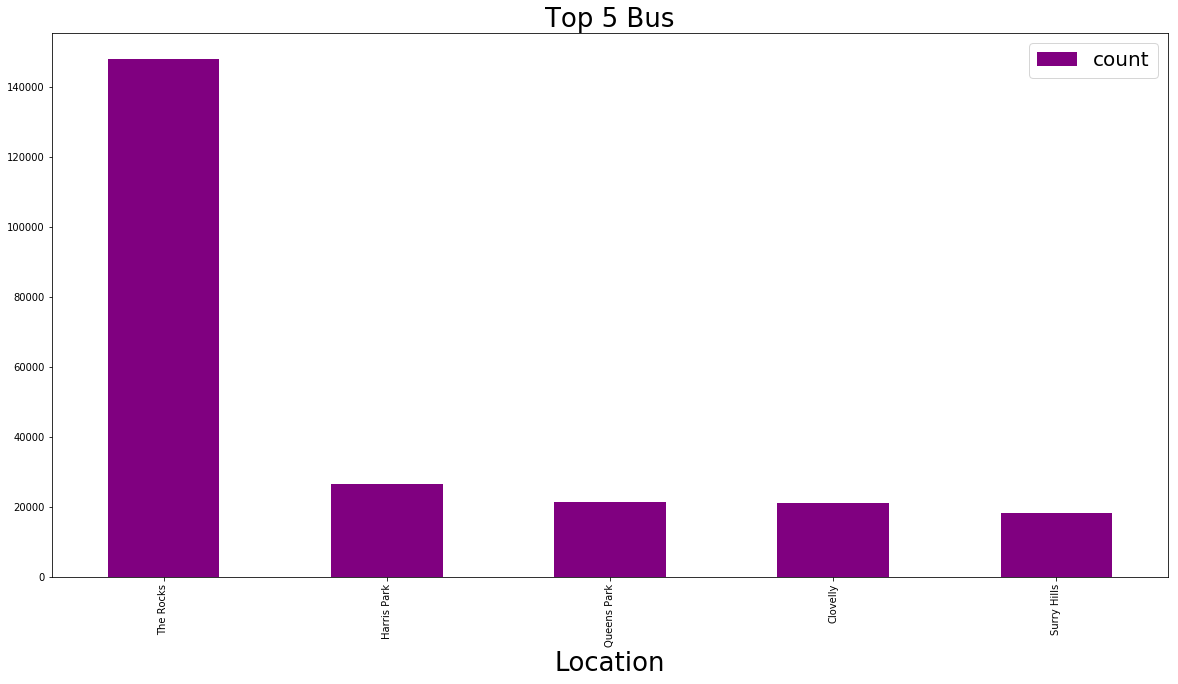

In [330]:
top_count_df[top_count_df['count'] > 0].plot.bar(x='Location', y='count', facecolor = 'purple')
plt.xlabel('Location', fontsize=26)
plt.title('Top 5 Bus', fontsize=26)
plt.legend(prop={'size':20})

In [331]:
graph_2 = opal_data[(opal_data['mode'] =='train') & (opal_data['loc'] != '-1') & (opal_data['tap'] =='on') & (opal_data['date'] == 20160809.0)]

In [332]:
new_columns_2 = graph_2.groupby("loc")["count"].sum()
# new_columns_2

In [333]:
sorted_2 = new_columns_2.sort_values(ascending = False)
sorted_2

loc
Central Station                 115886.0
Town Hall Station               109077.0
Wynyard Station                  78154.0
Parramatta Station               36754.0
North Sydney Station             31449.0
Circular Quay Station            29302.0
Redfern Station                  28114.0
Chatswood Station                27647.0
Bondi Junction Station           25390.0
Strathfield Station              23800.0
Martin Place Station             23645.0
Hurstville Station               20348.0
St Leonards Station              18290.0
Burwood Station                  17306.0
Blacktown Station                16584.0
Kings Cross Station              15888.0
UNKNOWN                          14518.0
Ashfield Station                 13013.0
Museum Station                   12785.0
Lidcombe Station                 12674.0
Macquarie University Station     12425.0
Kogarah Station                  12071.0
Hornsby Station                  11955.0
Mascot Station                   11650.0
Epping Stati

In [334]:
sorted_2.sum()

1206743.0

In [335]:
top_count_2 = sorted_2.head(5)
top_count_df_2 = top_count_2.to_frame()
top_count_df_2

,count
loc,
Central Station,115886.0
Town Hall Station,109077.0
Wynyard Station,78154.0
Parramatta Station,36754.0
North Sydney Station,31449.0


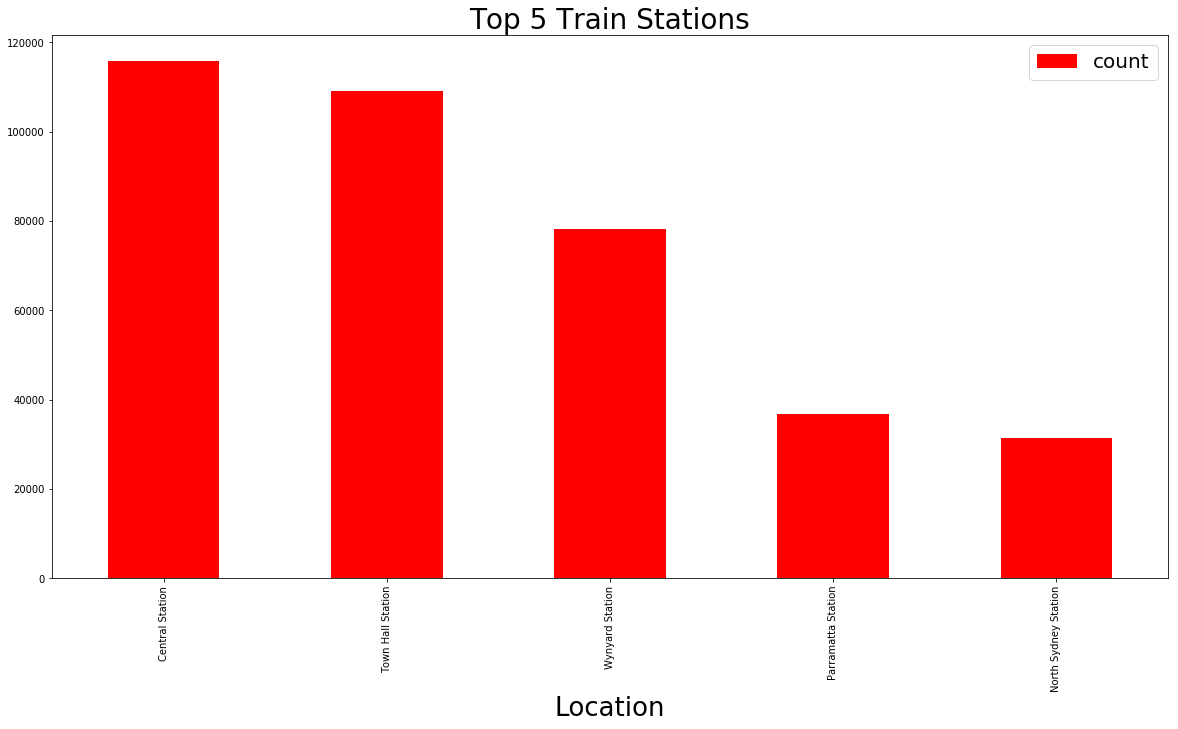

In [336]:
top_count_df_2[top_count_df_2['count'] > 0].plot.bar(y='count', facecolor = 'red')
plt.title('Top 5 Train Stations', fontsize=28)
plt.xlabel('Location', fontsize=26)
plt.legend(prop={'size':20})

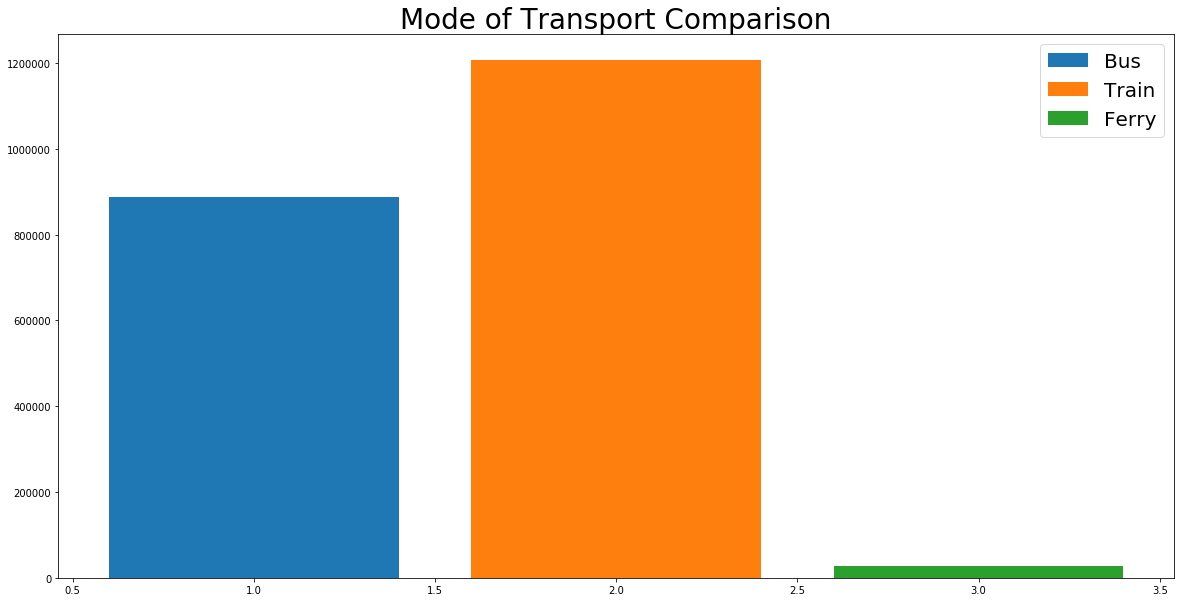

In [337]:
x = [1]
x2 = [2]
x3 = [3]
y = [887124]
y2 = [1206743]
y3 = [28037]
plt.bar(x, y, label='Bus')
plt.bar(x2, y2, label='Train')
plt.bar(x3, y3, label='Ferry')
plt.title('Mode of Transport Comparison', fontsize=28)
plt.legend(prop={'size':20})

In [338]:
graph_3 = opal_data[(opal_data['mode'] =='ferry') & (opal_data['loc'] != '-1') & (opal_data['tap'] =='on') & (opal_data['date'] == 20160809.0)]
graph_3

,mode,date,tap,time,loc,count,loc_con
213220,ferry,20160809.0,on,19:00,Manly Wharf,33.0,NaN
213221,ferry,20160809.0,on,19:00,Circular Quay No. 5 Wharf,28.0,NaN
213222,ferry,20160809.0,on,19:00,Circular Quay No. 3 Wharf,25.0,NaN
213223,ferry,20160809.0,on,19:00,Darling Harbour Wharf 3,21.0,NaN
213224,ferry,20160809.0,on,13:30,Queens Wharf,19.0,NaN
213225,ferry,20160809.0,on,13:30,Circular Quay No. 5 Wharf,55.0,NaN
213226,ferry,20160809.0,on,13:30,Circular Quay No. 3 Wharf,88.0,NaN
213227,ferry,20160809.0,on,13:30,Circular Quay No. 4 Wharf,42.0,NaN
213228,ferry,20160809.0,on,13:30,Watsons Bay Wharf,64.0,NaN
213229,ferry,20160809.0,on,13:30,Taronga Zoo Wharf,25.0,NaN


In [339]:
new_columns_3 = graph_3.groupby("loc")["count"].sum()

In [340]:
sorted_3 = new_columns_3.sort_values(ascending = False)
sorted_3

loc
Circular Quay No. 3 Wharf    5079.0
Manly Wharf                  4776.0
Circular Quay No. 5 Wharf    3264.0
Circular Quay No. 4 Wharf    2764.0
Circular Quay No. 2 Wharf    2702.0
Darling Harbour Wharf 3      1574.0
Taronga Zoo Wharf            1452.0
Rose Bay Wharf                899.0
UNKNOWN                       763.0
Balmain Wharf                 501.0
Watsons Bay Wharf             389.0
Milsons Point Wharf           358.0
Cabarita Wharf                340.0
Mosman Bay Wharf              310.0
Stockton Wharf                306.0
Balmain East Wharf            277.0
Abbotsford Wharf              221.0
Queens Wharf                  219.0
Cremorne Point Wharf          213.0
Drummoyne Wharf               186.0
Neutral Bay Wharf             170.0
Sydney Olympic Park Wharf     164.0
Rydalmere Wharf               163.0
Huntleys Point Wharf          151.0
Chiswick Wharf                131.0
Kurraba Point Wharf           125.0
South Mosman Wharf            124.0
Double Bay Wharf        

In [341]:
sorted_3.sum()

28037.0

In [342]:
top_count_3 = sorted_3.head(5)
top_count_df_3 = top_count_3.to_frame()
top_count_df_3

,count
loc,
Circular Quay No. 3 Wharf,5079.0
Manly Wharf,4776.0
Circular Quay No. 5 Wharf,3264.0
Circular Quay No. 4 Wharf,2764.0
Circular Quay No. 2 Wharf,2702.0
